***Цели работы:***
Исследовать набор данных о характеристиках исполняемых файлов (PE-файлов)

Провести анализ и визуализацию данных

Построить модель классификации для определения вредоносных файлов

Оценить важность различных признаков для классификации

Сохранить обученную модель для последующего использования

**1. Импорт необходимых библиотек**

In [1]:
import numpy as np  # для работы с числовыми массивами
import pandas as pd  # для обработки и анализа данных
import pickle  # для сохранения модели
import seaborn as sns  # для визуализации данных
import matplotlib.pyplot as plt  # для построения графиков
from sklearn.ensemble import RandomForestClassifier  # модель классификации
from sklearn.model_selection import train_test_split  # разделение данных
from sklearn.metrics import classification_report, confusion_matrix  # метрики оценки

**2. Загрузка и первичный осмотр данных**

In [3]:
import os
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use('ggplot')  # устанавливаем стиль графиков

!head dataset_malwares.csv  # просмотр первых строк файла

data = pd.read_csv('dataset_malwares.csv')  # загрузка данных

data.head()  # вывод первых 5 строк
data.info()  # информация о структуре данных

Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,SectionMaxPhysical,SectionMinPhysical,SectionMaxVirtual,SectionMinVirtual,SectionMaxPoint

**3. Подготовка данных и анализ распределения классов**

array([[<Axes: title={'center': 'Malware'}>]], dtype=object)

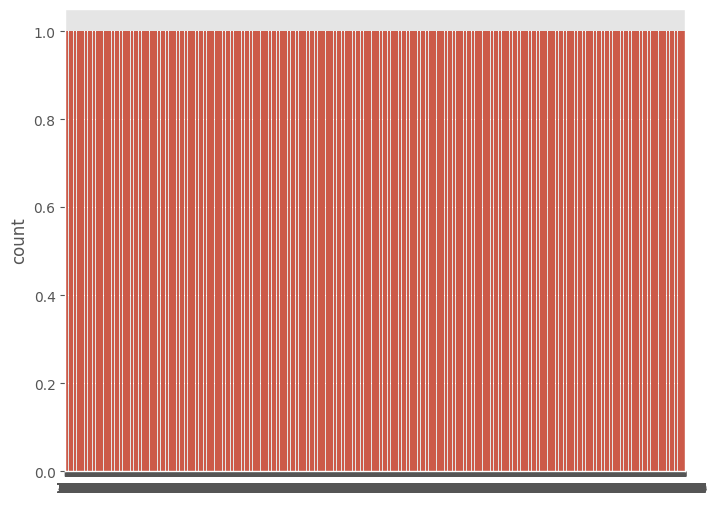

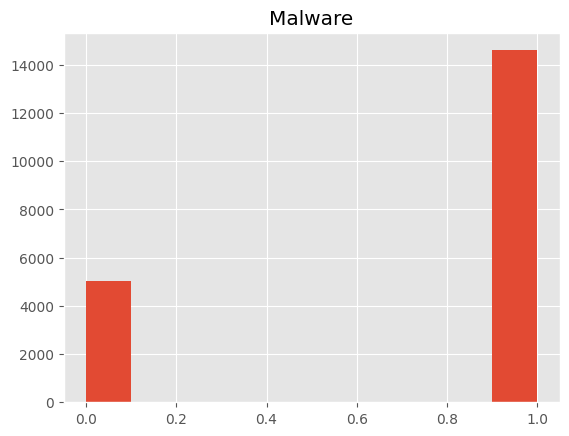

In [4]:
# Удаляем неиспользуемые столбцы
used_data = data.drop(['Name', 'Machine', 'TimeDateStamp', 'Malware'], axis=1)

# Визуализация распределения классов (Malware/Benign)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data['Malware'])

# Альтернативный вариант визуализации
data.hist(column='Malware')

**4. Анализ распределения признаков**

<ipython-input-5-f9cc927264c5>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-5-f9cc927264c5>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your

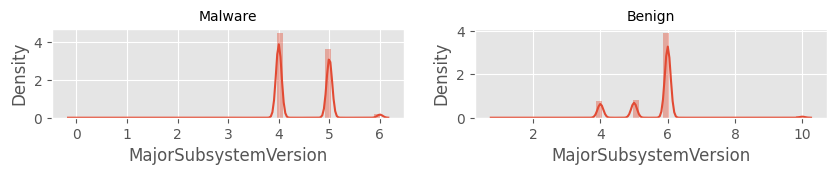

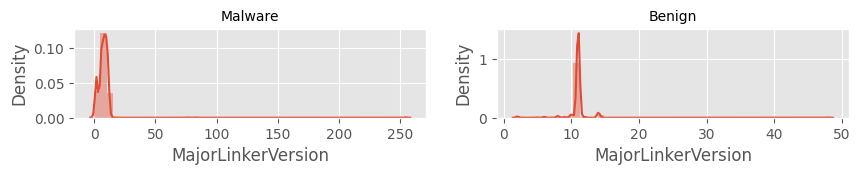

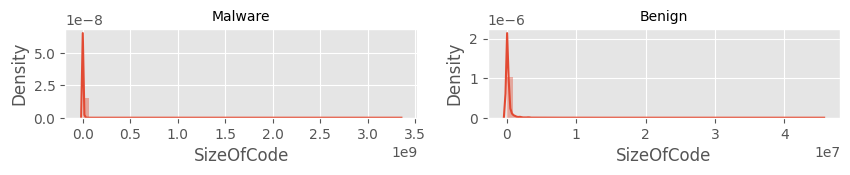

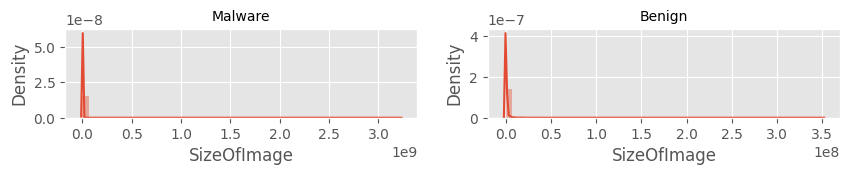

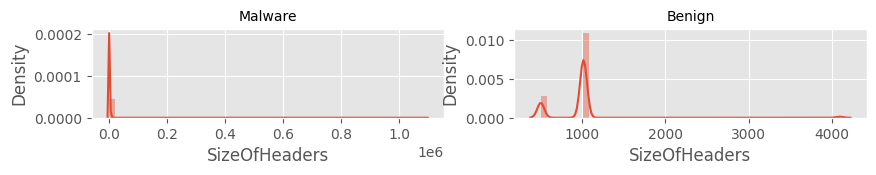

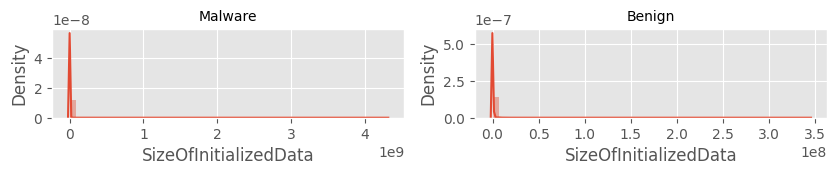

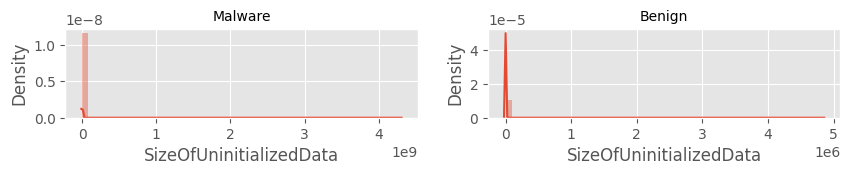

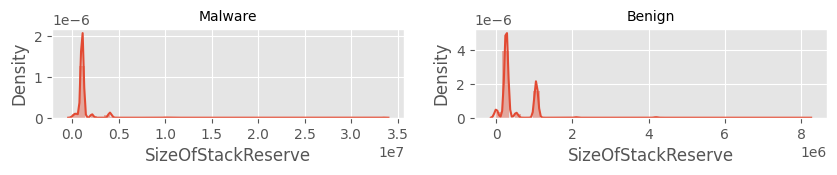

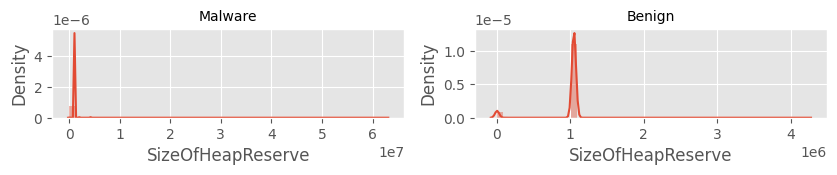

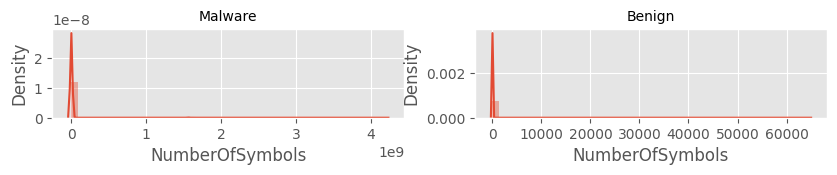

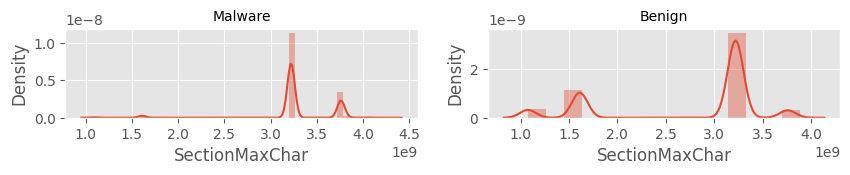

In [5]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage',
           'SizeOfHeaders', 'SizeOfInitializedData', 'SizeOfUninitializedData',
           'SizeOfStackReserve', 'SizeOfHeapReserve', 'NumberOfSymbols', 'SectionMaxChar']

# Строим распределения для каждого признака отдельно для Malware и Benign
i = 1
for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)

    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(data[data['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i = i+2

**5. Разделение данных и обучение модели**

In [6]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'],
                                                   test_size=0.2, random_state=0)

print(f'Number of used features is {X_train.shape[1]}')  # вывод количества признаков

# Создаем и обучаем модель Random Forest
rfc = RandomForestClassifier(n_estimators=100,  # количество деревьев
                           random_state=0,  # фиксация случайности
                           oob_score=True,  # расчет out-of-bag оценки
                           max_depth=16)  # максимальная глубина деревьев
rfc.fit(X_train, y_train)  # обучение модели

Number of used features is 75


RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

**6. Оценка модели**

              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97      1004
     Malware       0.99      1.00      0.99      2919

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



Text(50.722222222222214, 0.5, 'True labels')

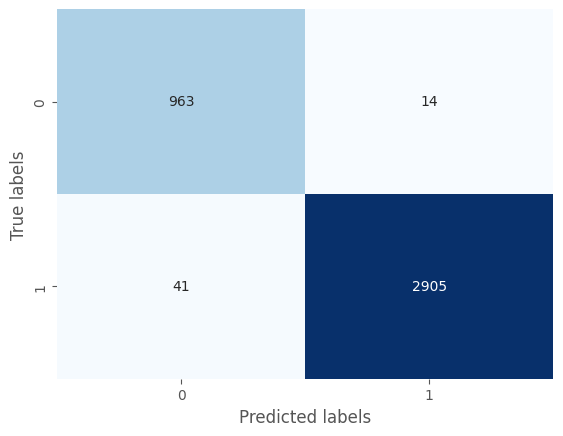

In [7]:
# Предсказание на тестовых данных
y_pred = rfc.predict(X_test)

# Вывод отчета о классификации
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

# Визуализация матрицы ошибок
ax = sns.heatmap(confusion_matrix(y_pred, y_test),
                annot=True,  # показ значений в ячейках
                fmt="d",  # целочисленный формат
                cmap=plt.cm.Blues,  # цветовая схема
                cbar=False)  # без цветовой шкалы
ax.set_xlabel('Predicted labels')  # подпись оси X
ax.set_ylabel('True labels')  # подпись оси Y

**7. Анализ важности признаков и сохранение модели**

<ipython-input-8-bf66d59420a7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1],  # признаки по убыванию важности


Text(0.5, 1.0, 'Features importance')

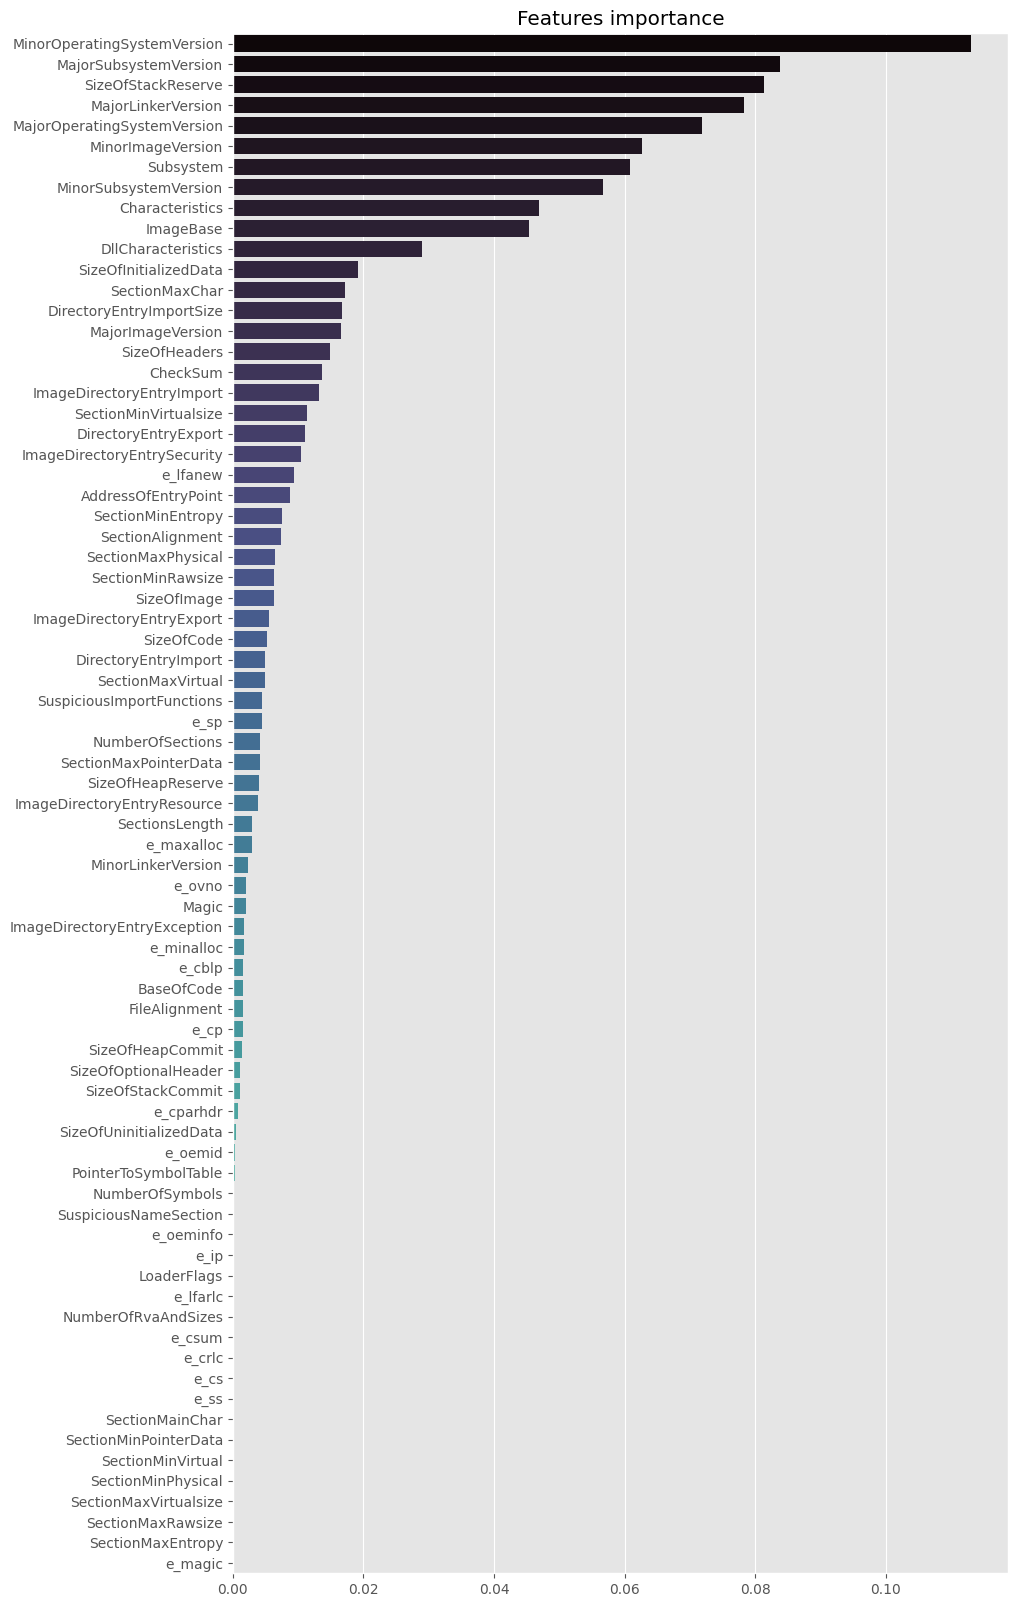

In [8]:
# Сохранение обученной модели в файл
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

# Анализ важности признаков
importance = rfc.feature_importances_  # получение важности признаков
importance_dict = {used_data.columns.values[i]: importance[i] for i in range(len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}

# Визуализация важности признаков
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1],  # признаки по убыванию важности
           x=list(sorted_dict.values())[::-1],  # значения важности
           palette='mako')  # цветовая палитра
plt.title('Features importance')  # заголовок графика